## Import the Dataset and Preprocess the Data

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.0'

In [3]:
import os
import zipfile

local_zip = 'Classification/training_set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Classification/training_set')

local_zip = 'Classification/validation_set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Classification/validation_set')

zip_ref.close()

In [4]:
# The contents of the .zip are extracted to the base directory /dataset,
# which in turn each contain cats and dogs subdirectories.
# Let's now define the 4 directories

train_dogs_dir = os.path.join('Classification/training_set/training_set/dogs')

train_cats_dir = os.path.join('Classification/training_set/training_set/cats')

validation_dogs_dir = os.path.join('Classification/validation_set/validation_set/dogs')

validation_cats_dir = os.path.join('Classification/validation_set/validation_set/cats')

In [5]:
#Let's view the file (image) labels of our dataset

train_dogs_names = os.listdir(train_dogs_dir)
print(train_dogs_names[:10])

train_cats_names = os.listdir(train_cats_dir)
print(train_cats_names[:10])

validation_dogs_hames = os.listdir(validation_dogs_dir)
print(validation_dogs_hames[:10])

validation_cats_names = os.listdir(validation_cats_dir)
print(validation_cats_names[:10])

['.DS_Store', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg']
['.DS_Store', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg']
['.DS_Store', 'dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg']
['.DS_Store', 'cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4006.jpg', 'cat.4007.jpg', 'cat.4008.jpg', 'cat.4009.jpg']


In [6]:
# Now we can View the number of Cats and Dogs images in the dataset

print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))

total training dogs images: 4001
total training cats images: 4001
total validation dogs images: 1001
total validation cats images: 1001


In [7]:
# Let's now view sample of pictures from our dataset!

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

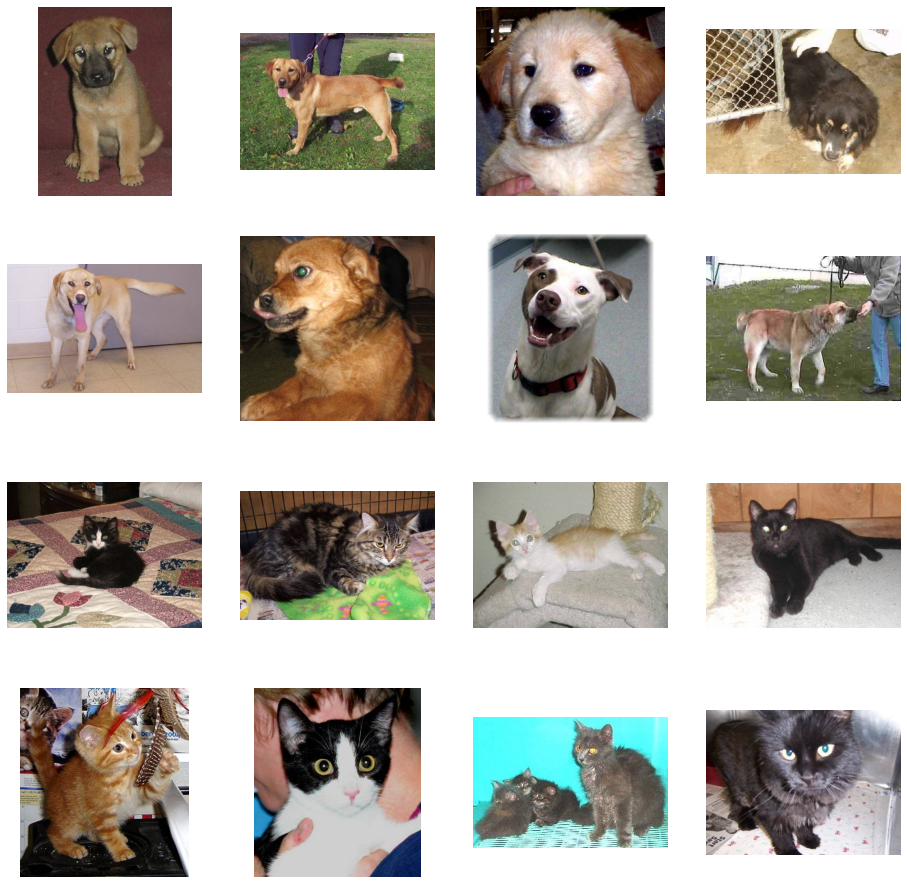

In [9]:
# Now, we will display a batch of 8 dogs and 8 cats pictures:
# Setting up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dogs_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_names[pic_index-8:pic_index]]
next_cats_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dogs_pix+next_cats_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
# Preprocessing the training set and applying data augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,  # Choose a shear_range
                                   zoom_range=0.2,  # Choose a zoom range
                                   horizontal_flip=True)  # Assign the Horizontal flip
training_set = train_datagen.flow_from_directory('Classification/training_set/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,  # Choose the batch size
                                                 class_mode='binary')


Found 8000 images belonging to 2 classes.


In [11]:
# Preprocessing the validation set
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = test_datagen.flow_from_directory('Classification/validation_set/validation_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Create and Train the Model

In [19]:
# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Note the input shape is the desired size of the image 64*64 with 3 bytes color
# Create the first Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Create a Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Create the second Convolutional Layer
### YOUR CODE HERE
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add another Pooling Layer
### YOUR CODE HERE
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten the results to feed into the CNN
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Convolutional Neural Network with 128 neuron hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation='sigmoid')) ### Choose Activation Function

# Creating the Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) ### Choose Activation Function

In [20]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [25]:
# We will train our model with the binary_crossentropy loss,
# because it's a binary classification problem and our final activation is a sigmoid.
# We will use the adam optimizer.
# During training, we will want to monitor classification accuracy.
cnn.compile(optimizer = "adam", loss='binary_crossentropy' , metrics = ['accuracy']) ### Choose Optimizer

In [27]:
#Training our CNN on the training set and evaluating it on the test set
cnn.fit(x = training_set, validation_data = validation_set, epochs = 50)

Epoch 1/50
250/250 [==============================] - 31s 125ms/step - loss: 0.6037 - accuracy: 0.6712 - val_loss: 0.5509 - val_accuracy: 0.7265
Epoch 2/50
250/250 [==============================] - 33s 131ms/step - loss: 0.5530 - accuracy: 0.7188 - val_loss: 0.5179 - val_accuracy: 0.7490
Epoch 3/50
250/250 [==============================] - 34s 137ms/step - loss: 0.5260 - accuracy: 0.7375 - val_loss: 0.5195 - val_accuracy: 0.7460
Epoch 4/50
250/250 [==============================] - 37s 147ms/step - loss: 0.5078 - accuracy: 0.7546 - val_loss: 0.4832 - val_accuracy: 0.7740
Epoch 5/50
250/250 [==============================] - 34s 137ms/step - loss: 0.4899 - accuracy: 0.7554 - val_loss: 0.4801 - val_accuracy: 0.7760
Epoch 6/50
250/250 [==============================] - 35s 141ms/step - loss: 0.4722 - accuracy: 0.7634 - val_loss: 0.5329 - val_accuracy: 0.7375
Epoch 7/50
250/250 [==============================] - 31s 126ms/step - loss: 0.4670 - accuracy: 0.7734 - val_loss: 0.5059 - val_ac

## Test the Model and Make Predictions

In [28]:
# Testing the CNN on your own Image!
import numpy as np
from keras.utils import load_img, img_to_array 

test_image = load_img('dog-image.jpg', target_size = (64, 64)) ### TRY Your Own Image!
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'dog' ### YOUR CODE HERE
else:
  prediction = 'cat' ### YOUR CODE HERE

1/1 [==============================] - 0s 263ms/step


In [29]:
print(prediction)

cat
